In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [8, 16]

In [2]:
import pandas as pd

X = pd.read_csv('War7_X.csv', sep=';', decimal=',', header=None).values
Xprime = pd.read_csv('War7_Xprime.csv', sep=';', decimal=',', header=None).values

U, S, Vh = np.linalg.svd(X, full_matrices=False)
V = Vh.T
A = Xprime @ V @ np.diag(1.0/S) @ U.T

Phi = U

In [3]:
def DMD(X,Xprime,r):
    U,Sigma,VT = np.linalg.svd(X,full_matrices=0) # Step 1
    Ur = U[:,:r]
    Sigmar = np.diag(Sigma[:r])
    VTr = VT[:r,:]
    Atilde = np.linalg.solve(Sigmar.T,(Ur.T @ Xprime @ VTr.T).T).T # Step 2
    Lambda, W = np.linalg.eig(Atilde) # Step 3
    Lambda = np.diag(Lambda)
    
    Phi = Xprime @ np.linalg.solve(Sigmar.T,VTr).T @ W # Step 4
    alpha1 = Sigmar @ VTr[:,0]
    b = np.linalg.solve(W @ Lambda,alpha1)
    return Phi, Lambda, b

In [4]:
Phi, Lambda, b = DMD(X[:,:-1],X[:,1:],21)

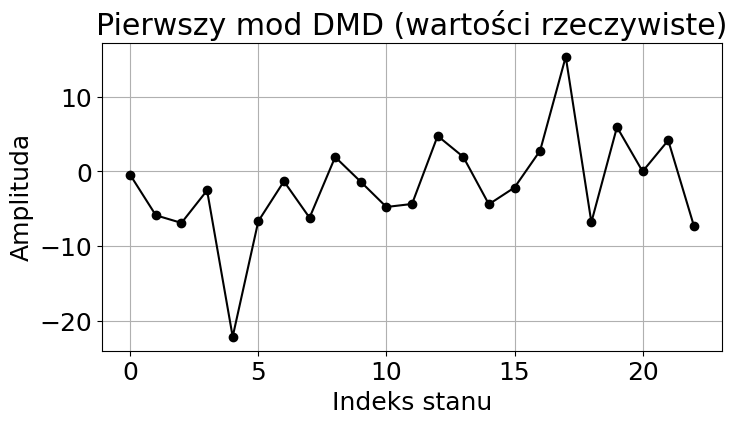

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(np.real(Phi[:, 0]), '-o', color='k')
plt.title('Pierwszy mod DMD (wartości rzeczywiste)')
plt.xlabel('Indeks stanu')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

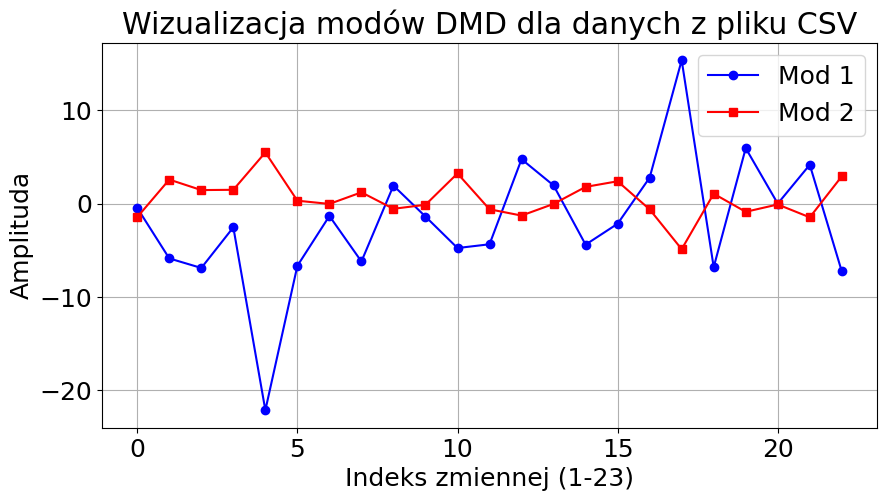

Obliczona macierz przekształcenia A
[[-6.30262726e+00  1.04801287e+02  6.52491966e+01 -9.74984320e+01
   4.77607695e+01 -1.08245034e+02  5.70582215e+01  8.16861034e+01
   2.09430341e+01 -2.65296315e+01 -1.40699251e+02 -3.04253319e+01
  -1.50378897e+01  6.54663273e+01  8.17205160e+01  3.41442746e+01
  -7.82065674e+01  4.53943147e+01 -8.58191060e+01 -5.13036488e+01
  -1.55513131e+01  8.27273814e+01 -3.01182356e+01]
 [-6.83803982e+00  1.71353551e+01 -4.74955724e+00 -8.84297402e+00
   8.82489276e+00 -4.11087885e-01  6.87774958e+00 -6.32360725e+00
  -1.37063006e+01 -1.03914131e+01 -2.32463698e+01  6.06506774e+00
   6.73226650e+00 -5.04879705e-01  7.26678803e+00  3.69972997e+00
  -8.32336989e+00  5.34381086e+00 -1.06473128e+00  4.47554313e+00
   1.73922606e+01  2.62305815e+00  5.04754004e+00]
 [-4.11256967e+00  2.50705884e+01  9.58752572e+00 -1.72490156e+01
   1.18687563e+01 -6.38088384e+00  1.21694430e+01  5.63670038e+00
  -8.69297822e+00 -8.45995678e+00 -3.48507121e+01 -3.12060555e-01
   4

In [6]:
plt.figure(figsize=(10, 5))

plt.plot(np.real(Phi[:, 0]), '-o', label='Mod 1', color='blue')
if Phi.shape[1] > 1:
    plt.plot(np.real(Phi[:, 1]), '-s', label='Mod 2', color='red')

plt.title('Wizualizacja modów DMD dla danych z pliku CSV')
plt.xlabel('Indeks zmiennej (1-23)')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

print("Obliczona macierz przekształcenia A")
print(A)